Network Graph Function
====================
Worksheet to create a re-usable, customizable function for creating
network graphs of multiple regressions.

In [1]:
# automatically reload changes we make to schools.py and ui.py
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


# graphs and viz
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx

import math

from IPython.display import Markdown as md
from school_data import schools, ui


In [2]:
# load the demographic data and merge it with the ELA data
df = schools.load_school_demographics()

# load the data from the csv file
ela = pd.read_csv("ela-combined.csv")


#drop the rows with NaN (where the pop is too small to report)
ela = ela[ela["mean_scale_score"].notnull()]
ela = df.merge(ela, how="inner", on=["dbn", "year"])
ela = ela.query("year == 2019 and category == 'All Students'")

In [3]:
# calculate coefficients for these factors
factors = ['total_enrollment', 'asian_pct',  'black_pct', 
       'hispanic_pct',  'white_pct','swd_pct',  'ell_pct',  'poverty_pct']

# y is the DV
y = ela['mean_scale_score']

X = ela[factors]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()


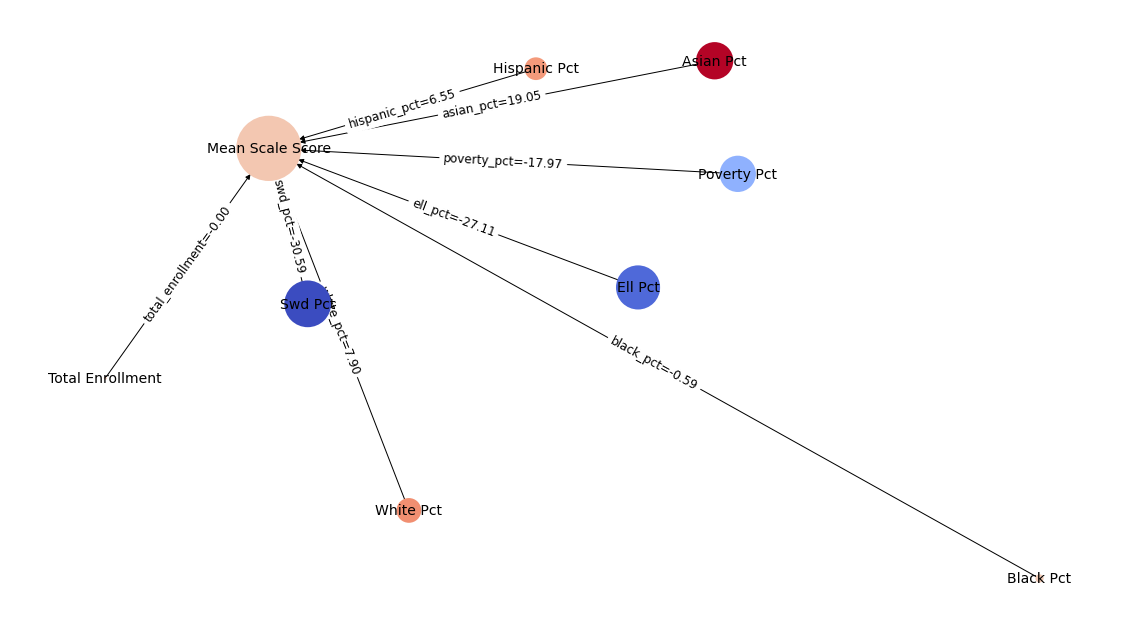

In [8]:


ui.plot_model(model)

[-0.0003594788752621541, 19.051510588378846, -0.5863111241567278, 6.554337012615922, 7.896592162052257, -30.59430737062124, -27.10825044702705, -17.974344406452797, 0]


ValueError: s must be a scalar, or float array-like with the same size as x and y

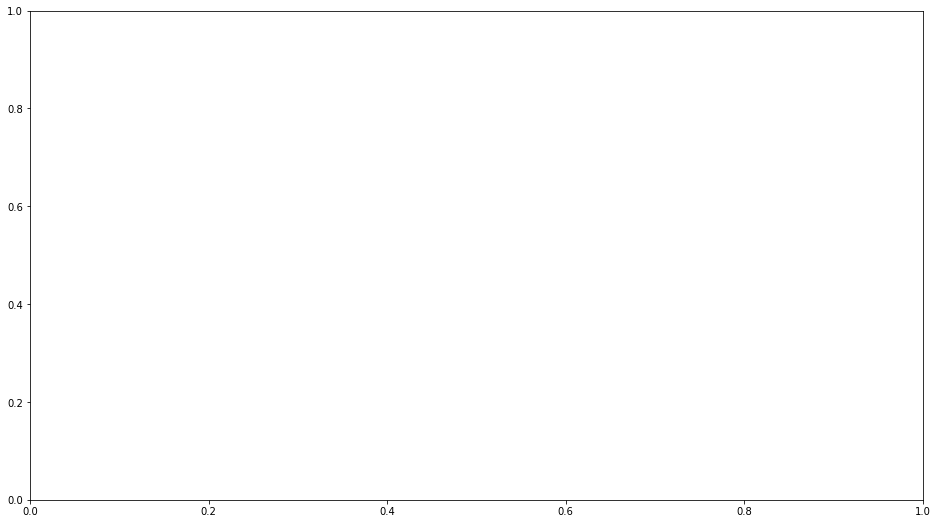

In [197]:
# create the graph and plot objects
G = nx.from_pandas_edgelist(
    data,
    source="node",
    edge_attr=['colors', 'node_size', 'weight', 'labels', 'edge_labels'],
)
fig, ax = plt.subplots(figsize=(16,9))
pos = nx.circular_layout(G)


# don't create an edge for the dependent variable to itself
G.remove_edge(dv, dv)

labels = nx.get_edge_attributes(G, "labels").values()
colors = nx.get_edge_attributes(G, "colors").values()
node_size = [abs(c) for c in coefs]
edge_labels = nx.get_edge_attributes(G, "edge_label").values()   



nx.draw_networkx_nodes(G, pos, ax = ax, node_color=coefs, cmap=cmap, node_size=node_size)
# nx.draw_networkx_nodes(G, pos, ax = ax, node_color=colors, node_size=node_size, cmap=cmap)
# nx.draw_networkx_edges(G, pos, ax=ax)
# nx.draw_networkx_edge_labels(G,pos, ax=ax, edge_labels=edge_labels, label_pos=.5, font_size=10)
# nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=14)



# to make sure our labels don't get clipped

plt.tight_layout()
plt.margins(0.05)
list(zip(coefs, colors))
node_size
